In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
globals = nx.Graph()

Сгенерируем случайный граф с количеством вершин n и количеством ребер m и нарисуем его

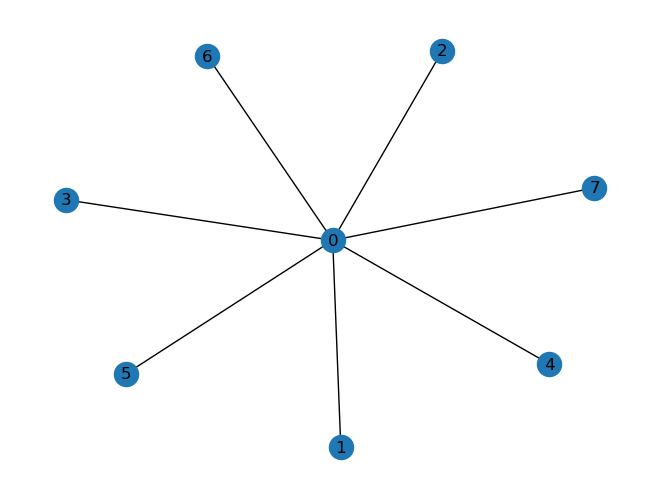

In [3]:
e, v = 8, 7 # e - количество ребер, v - количество вершин  
g = nx.barabasi_albert_graph(e, v)
nx.draw(g, with_labels=True)
plt.show()

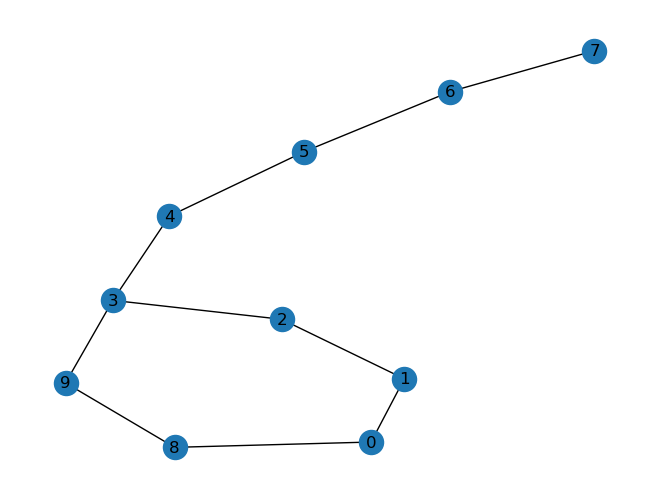

In [4]:
g = nx.Graph()
g.add_nodes_from(range(10))
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (0, 8), (8, 9), (9, 3)]
g.add_edges_from(edges)

nx.draw(g, with_labels=True)
plt.show()

Выберем рандомные 2 вершины и сделаем 1 шаг по наименьшему пути 

In [5]:
node_1, node_2 = 0, 3

Функция для шагания на k шагов по наикратчайшему расстоянию от node_1 до node_2 по случайному из кратчайших путей

In [6]:
def k_steps_in_shortest_path_direction(g, source, target, k):
    paths = list(nx.all_shortest_paths(g, source, target)) # compute all the shortest paths from source to target 
    rand_p = paths[random.randint(0, len(paths)-1)] # choose random path
    if (k+1 < len(rand_p)):
        rand_p = rand_p[:k+1]
    
    path = []
    for n in range(len(rand_p)-1):
        path.append((rand_p[n], rand_p[n+1]))
    return path

Отрисовка графа и пути 

In [7]:
def draw_particle_path(g, path):
    pos = nx.spring_layout(g, seed=7)
    edges = list(g.edges)
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_edges(g, pos, edgelist=edges)
    nx.draw_networkx_edges(g, pos, edgelist=path, edge_color="red")
    nx.draw_networkx_labels(g, pos)
    plt.show()
    pass

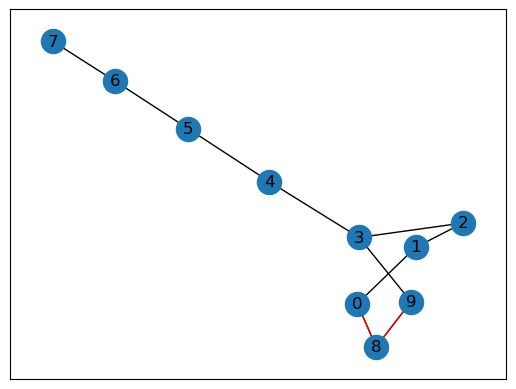

In [8]:
rand_path = k_steps_in_shortest_path_direction(g, node_1, node_2, 2)
rand_path
type(rand_path)
draw_particle_path(g, rand_path)

Перчисление соседей для конкретной вершины

In [27]:
for n, nbrs in g.adj.items():
    print(f'node {n}, neighbours: ')
    for k in nbrs.keys():
        print(f'{k} ')

node 0, neighbours: 
1 
8 
node 1, neighbours: 
0 
2 
node 2, neighbours: 
1 
3 
node 3, neighbours: 
2 
4 
9 
node 4, neighbours: 
3 
5 
node 5, neighbours: 
4 
6 
node 6, neighbours: 
5 
7 
node 7, neighbours: 
6 
node 8, neighbours: 
0 
9 
node 9, neighbours: 
8 
3 


Получение подграфа из исходного

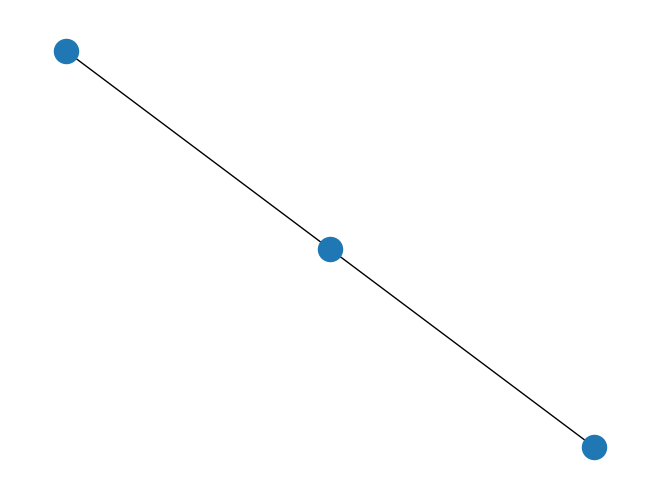

In [30]:
nodes_list = [1, 2, 3]
new_g = nx.subgraph(g, nodes_list)
nx.draw(new_g)